In [28]:
import numpy as np
import pandas as pd
import pathlib
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import scanpy as sc
import pickle

import sys
sys.path.append('../src')
from utils import *

## All relevent materials involved in the following example are availabel from [here](https://drive.google.com/drive/folders/1PXv_brtr-tXshBVEd_HSPIagjX9oF7Kg?usp=sharing)

### Step 1: Preprocessing

In [25]:
ad_sp = sc.read('../demo_data/MERFISH_mop.h5ad')

ad_sp.obs = ad_sp.obs.rename(columns = {'X':'x', 'Y':'y'})
cell_locations = ad_sp.obs.copy()
cell_locations['spot_index'] = np.array(cell_locations.index)
cell_locations['cell_index'] = cell_locations['spot_index'].map(lambda x:x+'_0')
cell_locations['cell_nums'] = np.ones(cell_locations.shape[0]).astype(int)
ad_sp.uns['cell_locations'] = cell_locations

ad_sp.write('../demo_data/MERFISH_mop_preprocess.h5ad')

In [45]:
ad_sp.shape

(5551, 247)

### Step 2: Cell type identification

python ./src/Cell_Type_Identification.py \
            --cell_class_column subclass_label \
            --tissue merfish \
            --out_dir ./output \
            --ST_Data ./demo_data/MERFISH_mop_preprocess.h5ad \
            --SC_Data ./Ckpts_scRefs/MOp/Ref_snRNA_mop_qc3_2Kgenes.h5ad \
            --hs_ST 

### Step 3: Gene expression imputation

## Fig. a

In [37]:
color_dict = {'Astro': '#1f77b4',
 'Endo': '#aec7e8',
 'L2/3 IT': '#ff7f0e',
 'L5 ET': '#ffbb78',
 'L5 IT': '#2ca02c',
 'L5/6 NP': '#98df8a',
 'L6 CT': '#d62728',
 'L6 IT': '#ff9896',
 'L6b': '#9467bd',
 'Lamp5': '#c5b0d5',
 'Micro': '#8c564b',
 'Oligo': '#c49c94',
 'OPC': '#e377c2',
 'Peri': '#f7b6d2',
 'Pvalb': '#7f7f7f',
 'PVM': '#a3a2a2',
 'Sncg': '#bcbd22',
 'Sst': '#dbdb8d',
 'Vip': '#17becf',
 'VLMC': '#9edae5',
 'None': '#dbd9d9'}

labelnames = ['Astro', 'Endo', 'L2/3 IT', 'L5 IT', 'L5 ET', 'L5/6 NP', 'L6 IT', 'L6 CT', 'L6b', 'Lamp5', 'Micro', 'Oligo', 'OPC', 'Peri', 'Pvalb',
'PVM', 'Sncg', 'Sst', 'Vip', 'VLMC']

In [32]:
ad_sp = sc.read('../output/merfish/sp_adata.h5ad')

In [35]:
p2_res = ad_sp.uns['cell_locations']

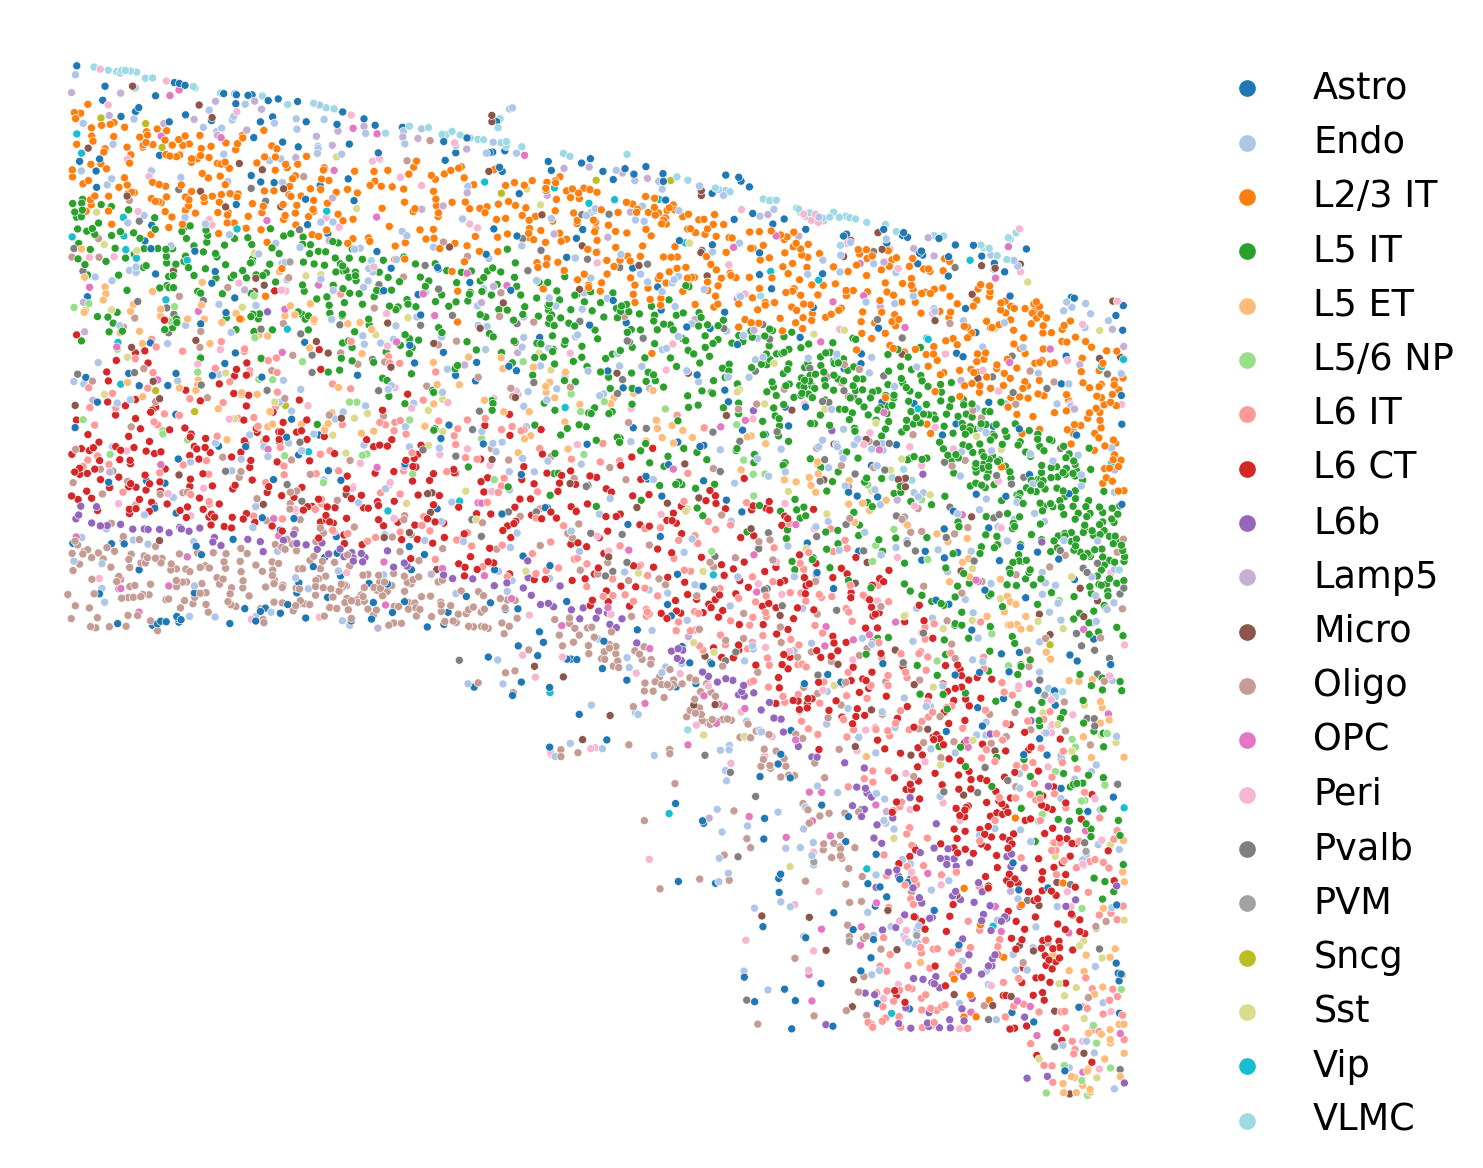

In [39]:
sns.set_context('paper',font_scale=2) 
plt.subplots(figsize=(10,10),dpi=150)
sns.scatterplot(data=p2_res, x="x", y="y", hue="discrete_label_ct",hue_order=labelnames,s=15,palette=color_dict)
plt.legend(bbox_to_anchor=(1.0,0.98), loc="upper left",framealpha=0,markerscale=1.5)
plt.gca().invert_yaxis()
plt.axis('off')
plt.show()

/home/share/xiaojs/software/netMHCpan-4.1/Linux_x86_64/tmp/ipykernel_32499/1305571735.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p2_res_plot = p2_res_plot_None.append(p2_res_plot_NonNone)


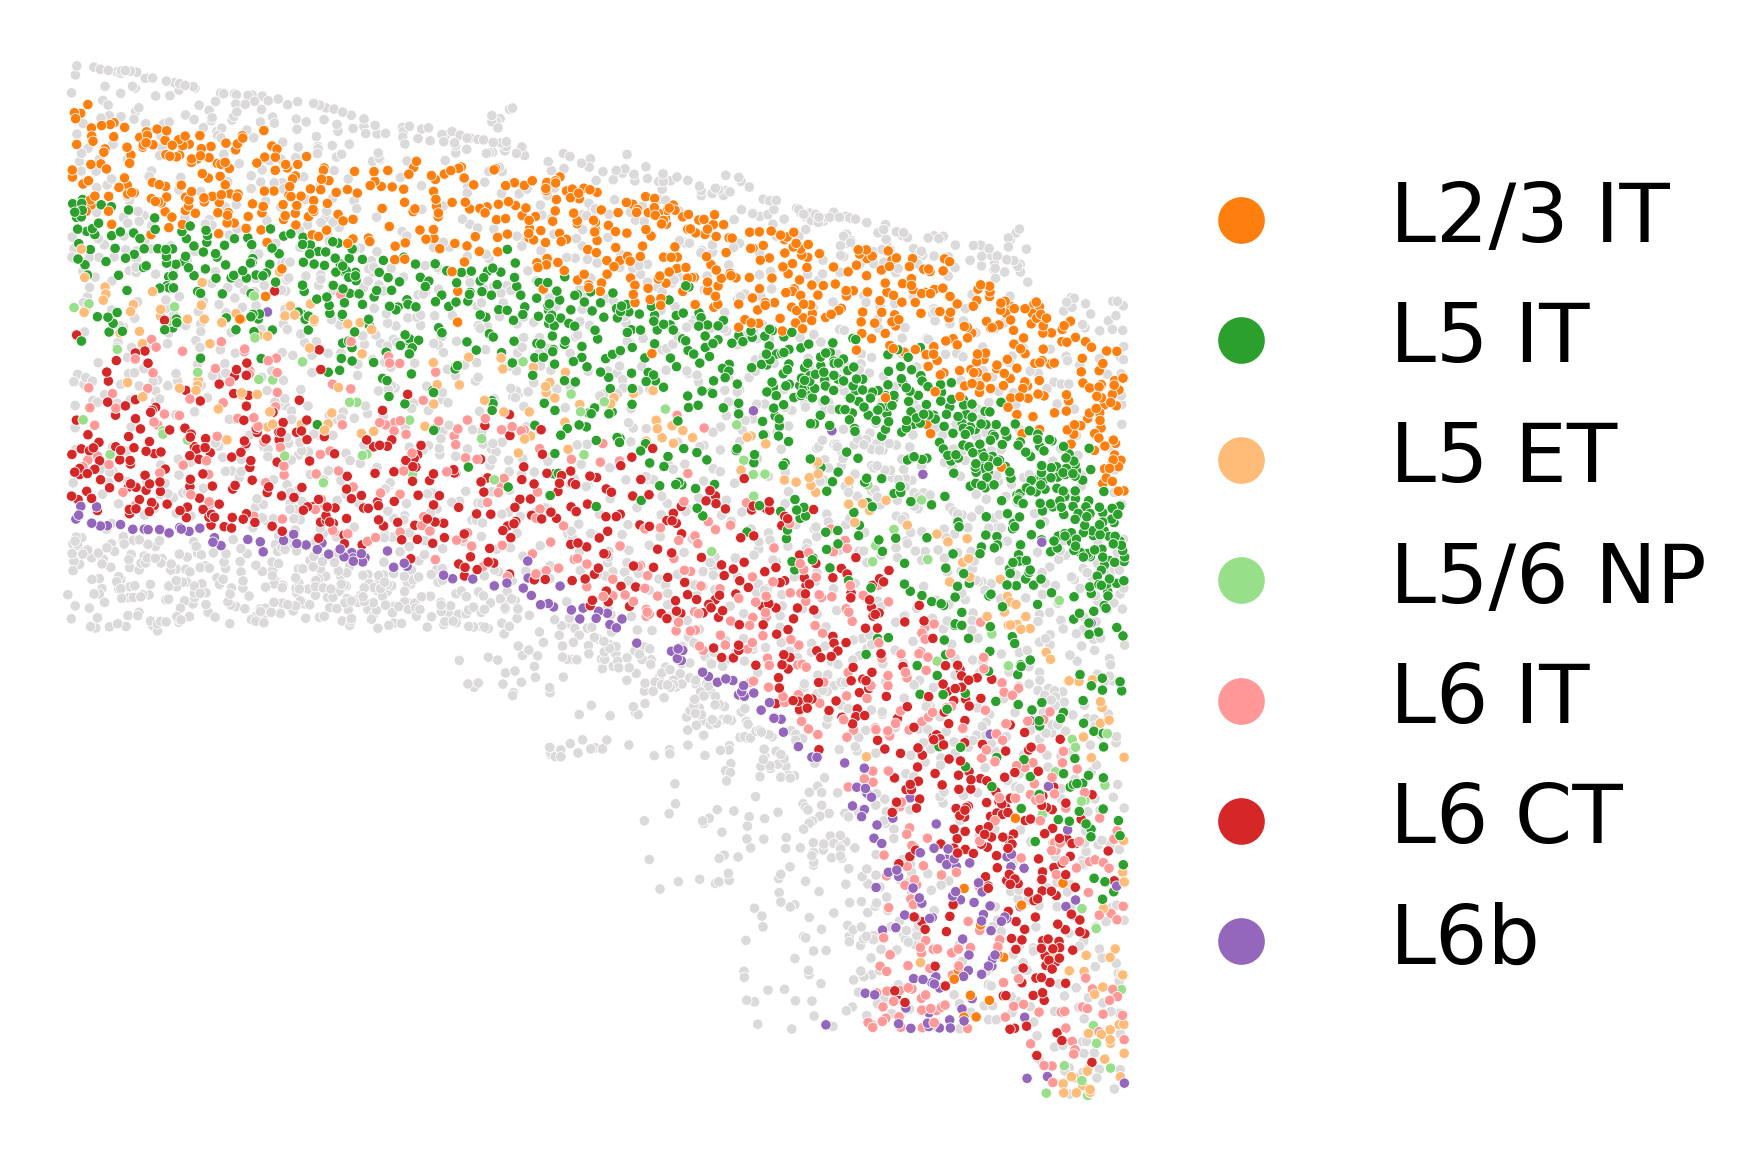

In [40]:
sns.set_context('paper',font_scale=4.5) 
plt.subplots(figsize=(10,10),dpi=150)
ex_neuronal = ['L2/3 IT', 'L5 IT', 'L5 ET', 'L5/6 NP', 'L6 IT', 'L6 CT', 'L6b']
p2_res_plot = p2_res.copy()
p2_res_plot.loc[~p2_res_plot['discrete_label_ct'].isin(ex_neuronal),'discrete_label_ct']='None'
p2_res_plot_None = p2_res_plot.loc[p2_res_plot['discrete_label_ct']=='None']
p2_res_plot_NonNone = p2_res_plot.loc[p2_res_plot['discrete_label_ct']!='None']
p2_res_plot = p2_res_plot_None.append(p2_res_plot_NonNone)
sns.scatterplot(data=p2_res_plot, x="x", y="y", hue="discrete_label_ct",hue_order=ex_neuronal,s=25,palette=color_dict)
plt.legend(bbox_to_anchor=(.92,0.92), loc="upper left",framealpha=0,markerscale=4.5)
plt.gca().invert_yaxis()
plt.axis('off')
plt.show()

/home/share/xiaojs/software/netMHCpan-4.1/Linux_x86_64/tmp/ipykernel_32499/486759856.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p2_res_plot = p2_res_plot_None.append(p2_res_plot_NonNone)


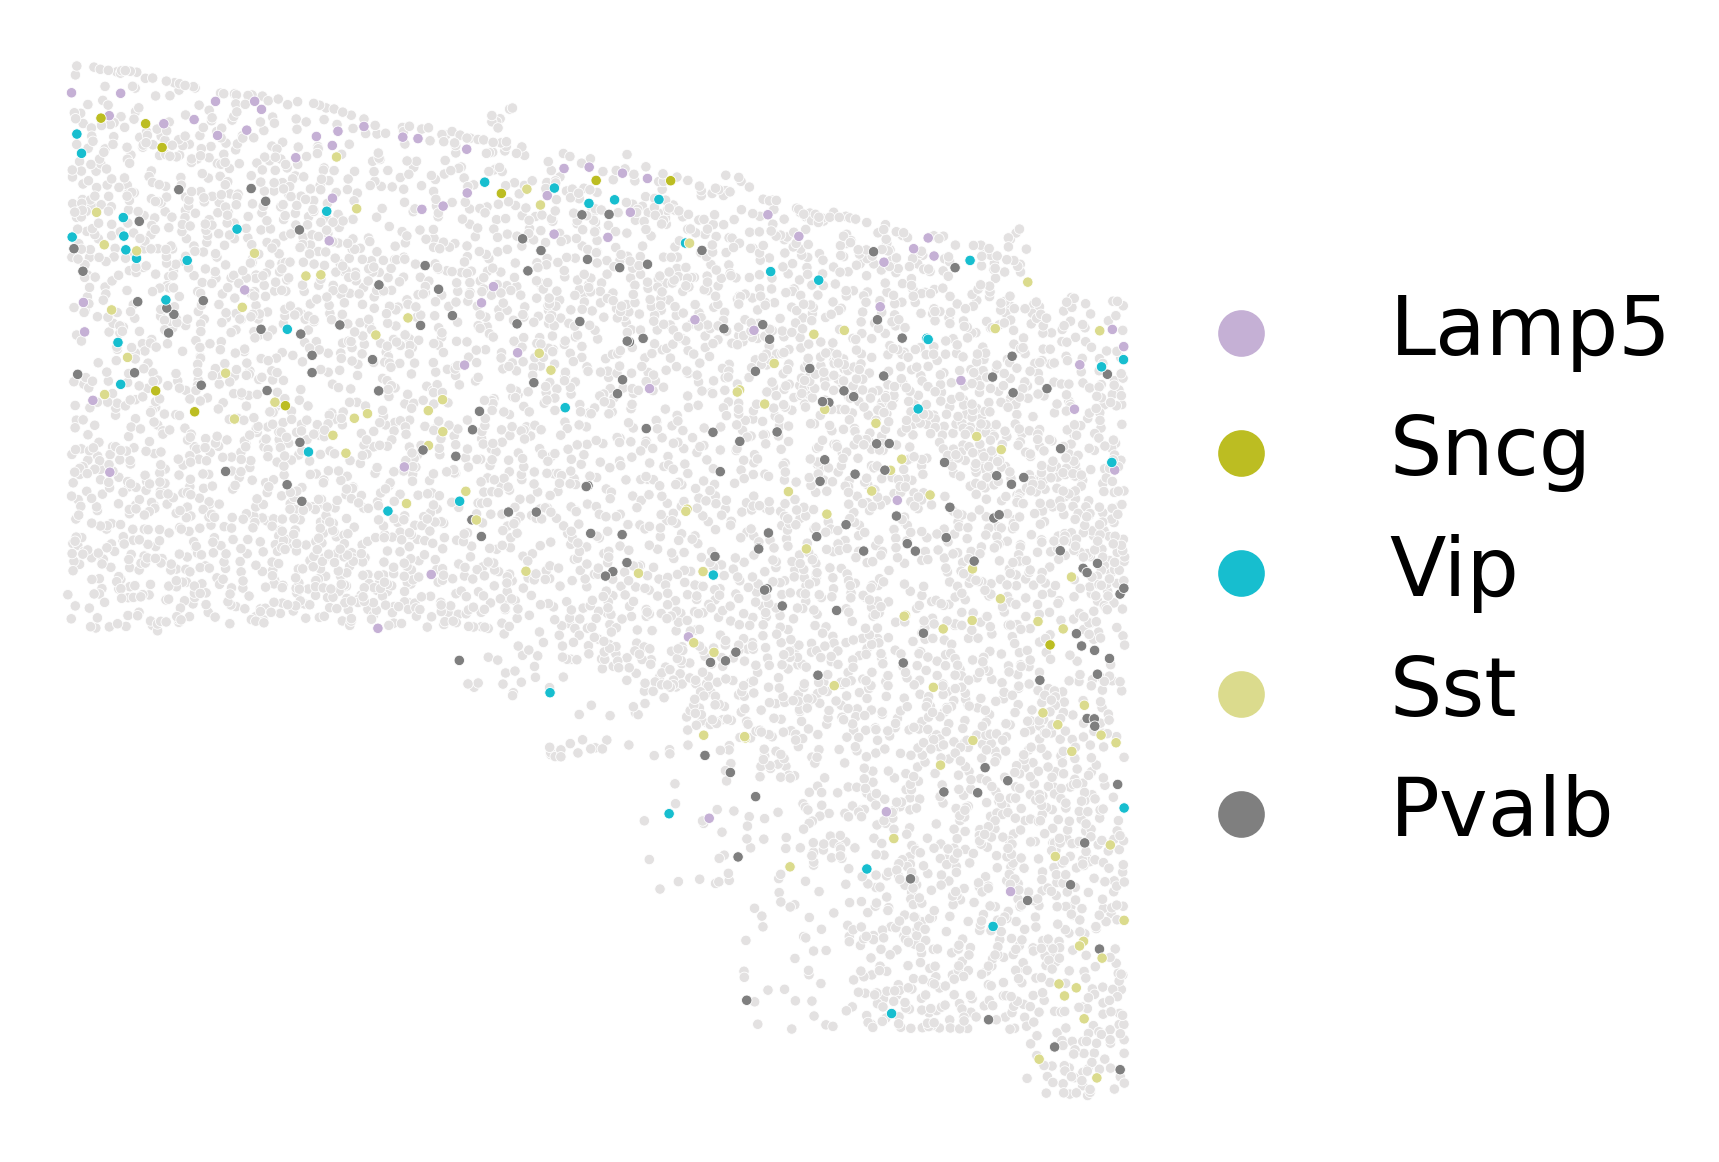

In [42]:
color_dict['None'] = '#e3e1e1'

sns.set_context('paper',font_scale=4.5) 
plt.subplots(figsize=(10,10),dpi=150)
inh_neuronal = ['Lamp5', 'Sncg', 'Vip', 'Sst', 'Pvalb']
p2_res_plot = p2_res.copy()
p2_res_plot.loc[~p2_res_plot['discrete_label_ct'].isin(inh_neuronal),'discrete_label_ct']='None'
p2_res_plot_None = p2_res_plot.loc[p2_res_plot['discrete_label_ct']=='None']
p2_res_plot_NonNone = p2_res_plot.loc[p2_res_plot['discrete_label_ct']!='None']
p2_res_plot = p2_res_plot_None.append(p2_res_plot_NonNone)
sns.scatterplot(data=p2_res_plot, x="x", y="y", hue="discrete_label_ct",hue_order=inh_neuronal,s=25,palette=color_dict)
plt.legend(bbox_to_anchor=(.92,0.82), loc="upper left",framealpha=0,markerscale=4.5)
plt.gca().invert_yaxis()
plt.axis('off')
plt.show()

/home/share/xiaojs/software/netMHCpan-4.1/Linux_x86_64/tmp/ipykernel_32499/1395075864.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p2_res_plot = p2_res_plot_None.append(p2_res_plot_NonNone)


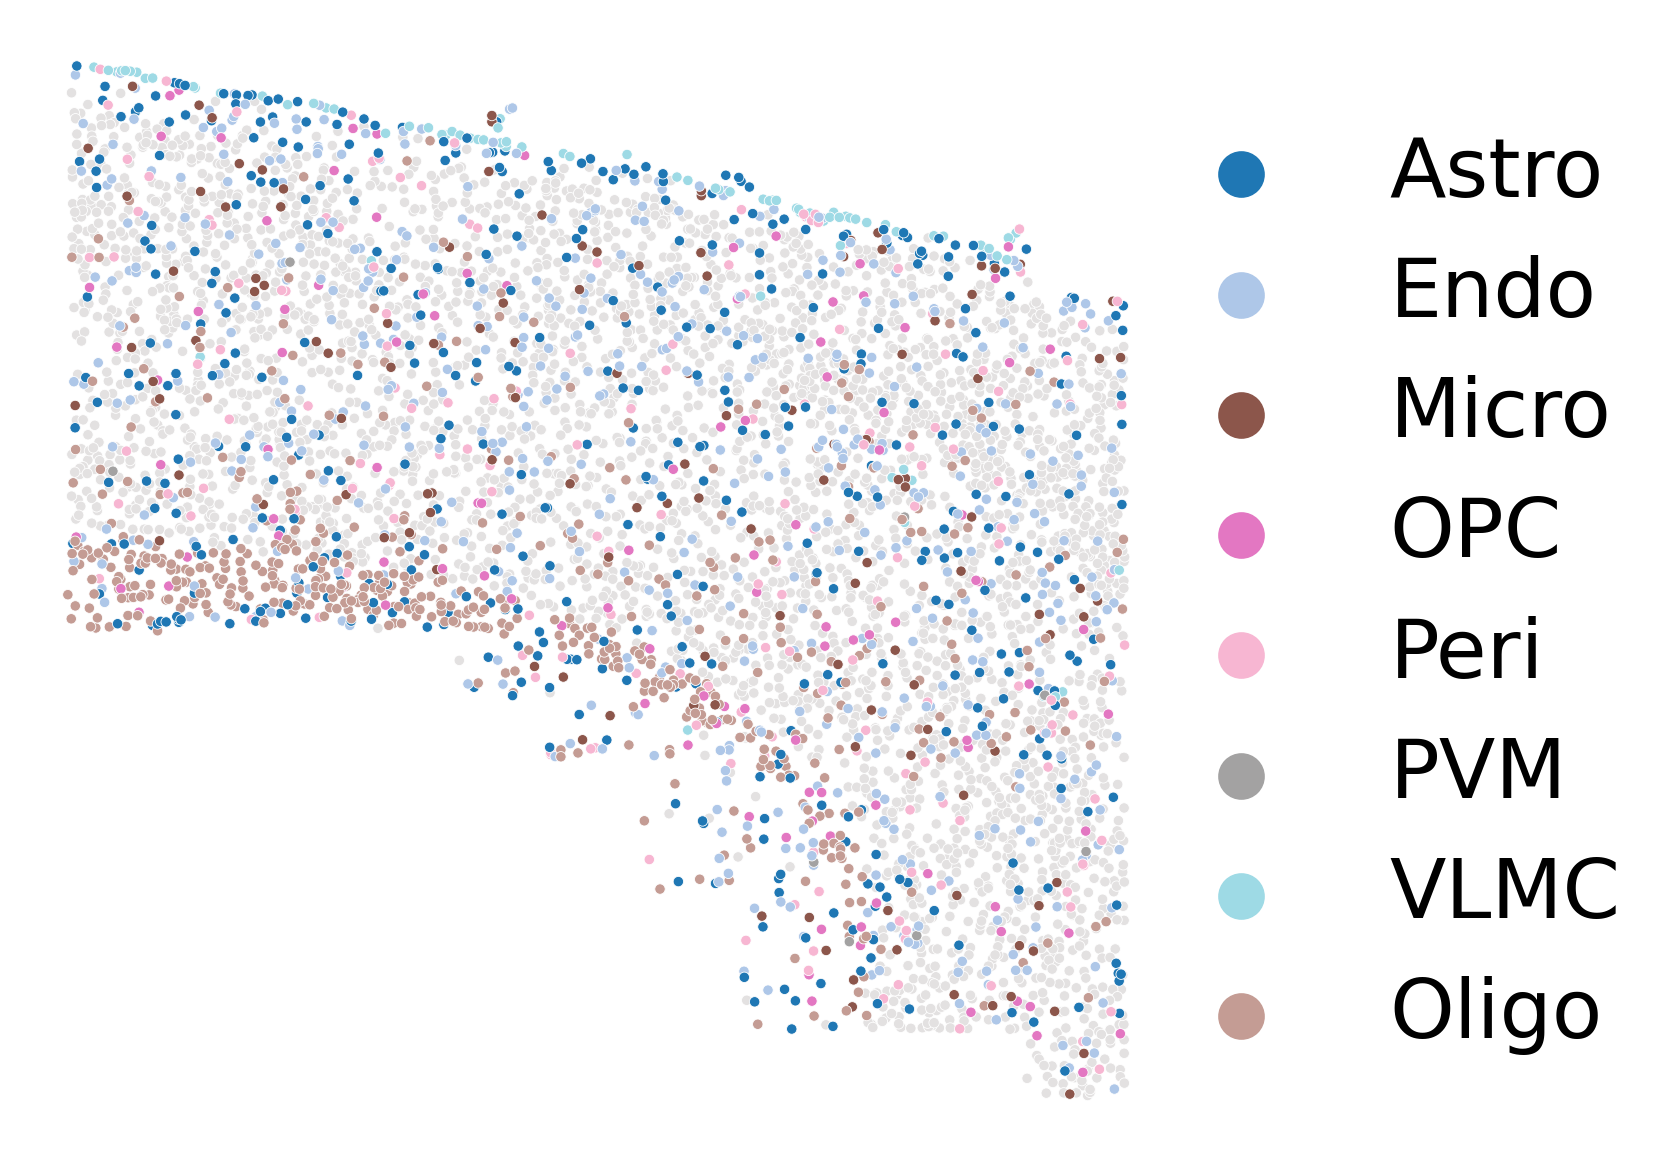

In [43]:
sns.set_context('paper',font_scale=4.5) 
plt.subplots(figsize=(10,10),dpi=150)
non_neuronal = ['Astro', 'Endo', 'Micro','OPC','Peri','PVM','VLMC','Oligo']
p2_res_plot = p2_res.copy()
p2_res_plot.loc[~p2_res_plot['discrete_label_ct'].isin(non_neuronal),'discrete_label_ct']='None'
p2_res_plot_None = p2_res_plot.loc[p2_res_plot['discrete_label_ct']=='None']
p2_res_plot_NonNone = p2_res_plot.loc[p2_res_plot['discrete_label_ct']!='None']
p2_res_plot = p2_res_plot_None.append(p2_res_plot_NonNone)
sns.scatterplot(data=p2_res_plot, x="x", y="y", hue="discrete_label_ct",hue_order=non_neuronal,s=25,palette=color_dict)
plt.legend(bbox_to_anchor=(.92,0.96), loc="upper left",framealpha=0,markerscale=4.5)
plt.gca().invert_yaxis()
plt.axis('off')
plt.show()

## Fig. b

/home/jxiaoae/.conda/envs/SpatialScope/lib/python3.9/site-packages/anndata/_core/merge.py:942: UserWarning: Only some AnnData objects have `.raw` attribute, not concatenating `.raw` attributes.
  warn(
/home/jxiaoae/.conda/envs/SpatialScope/lib/python3.9/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],


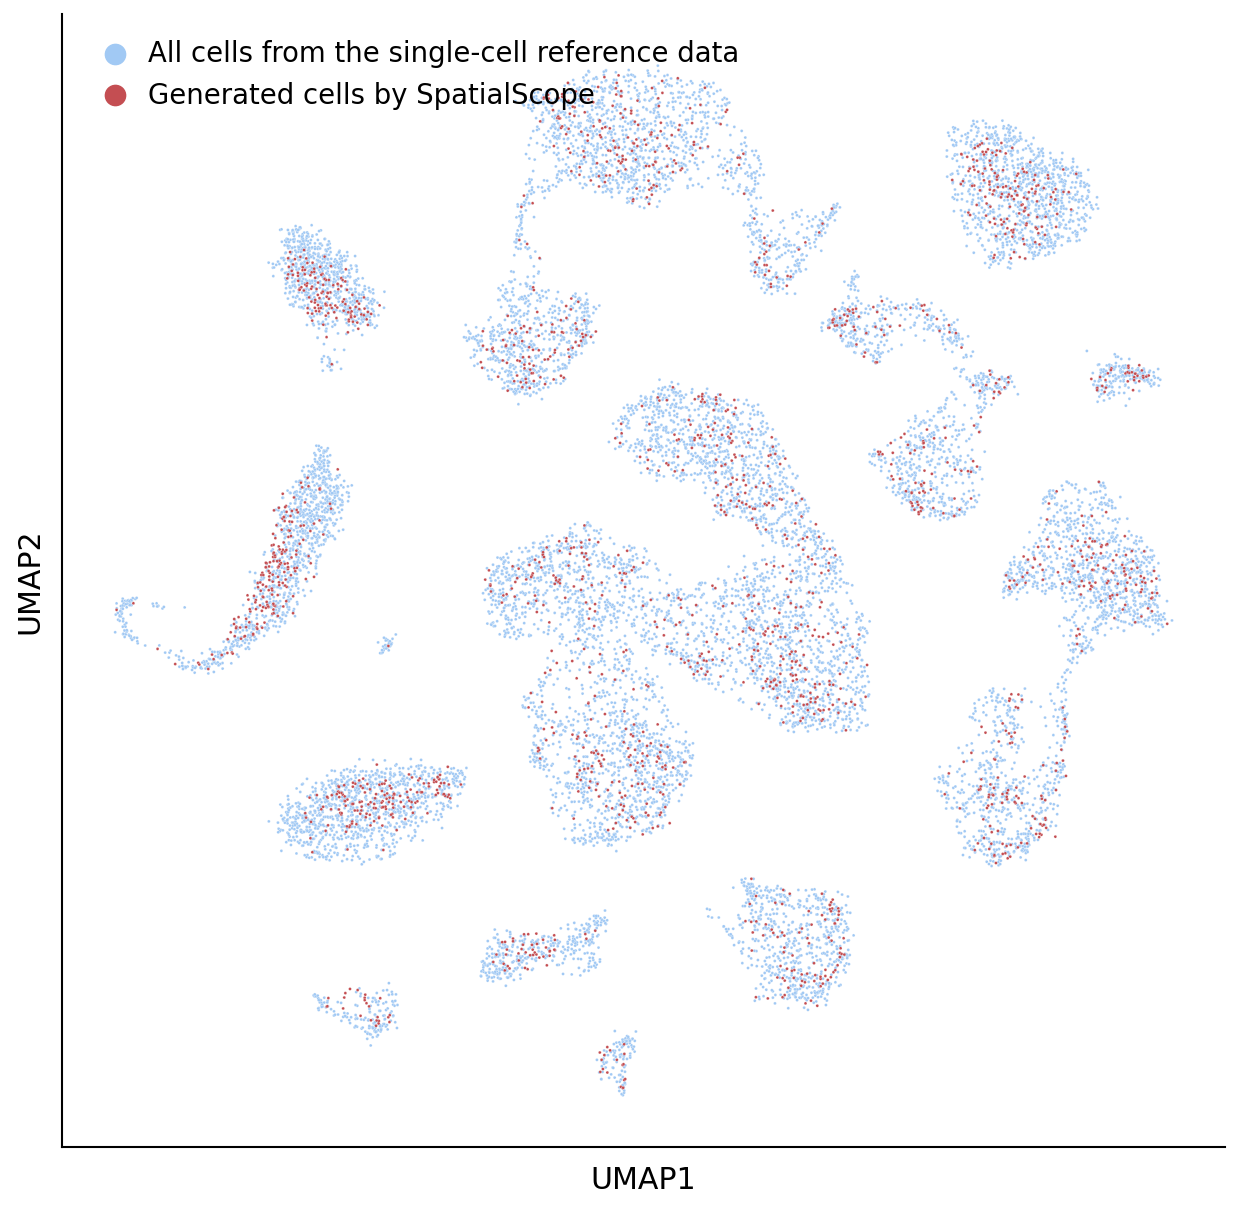

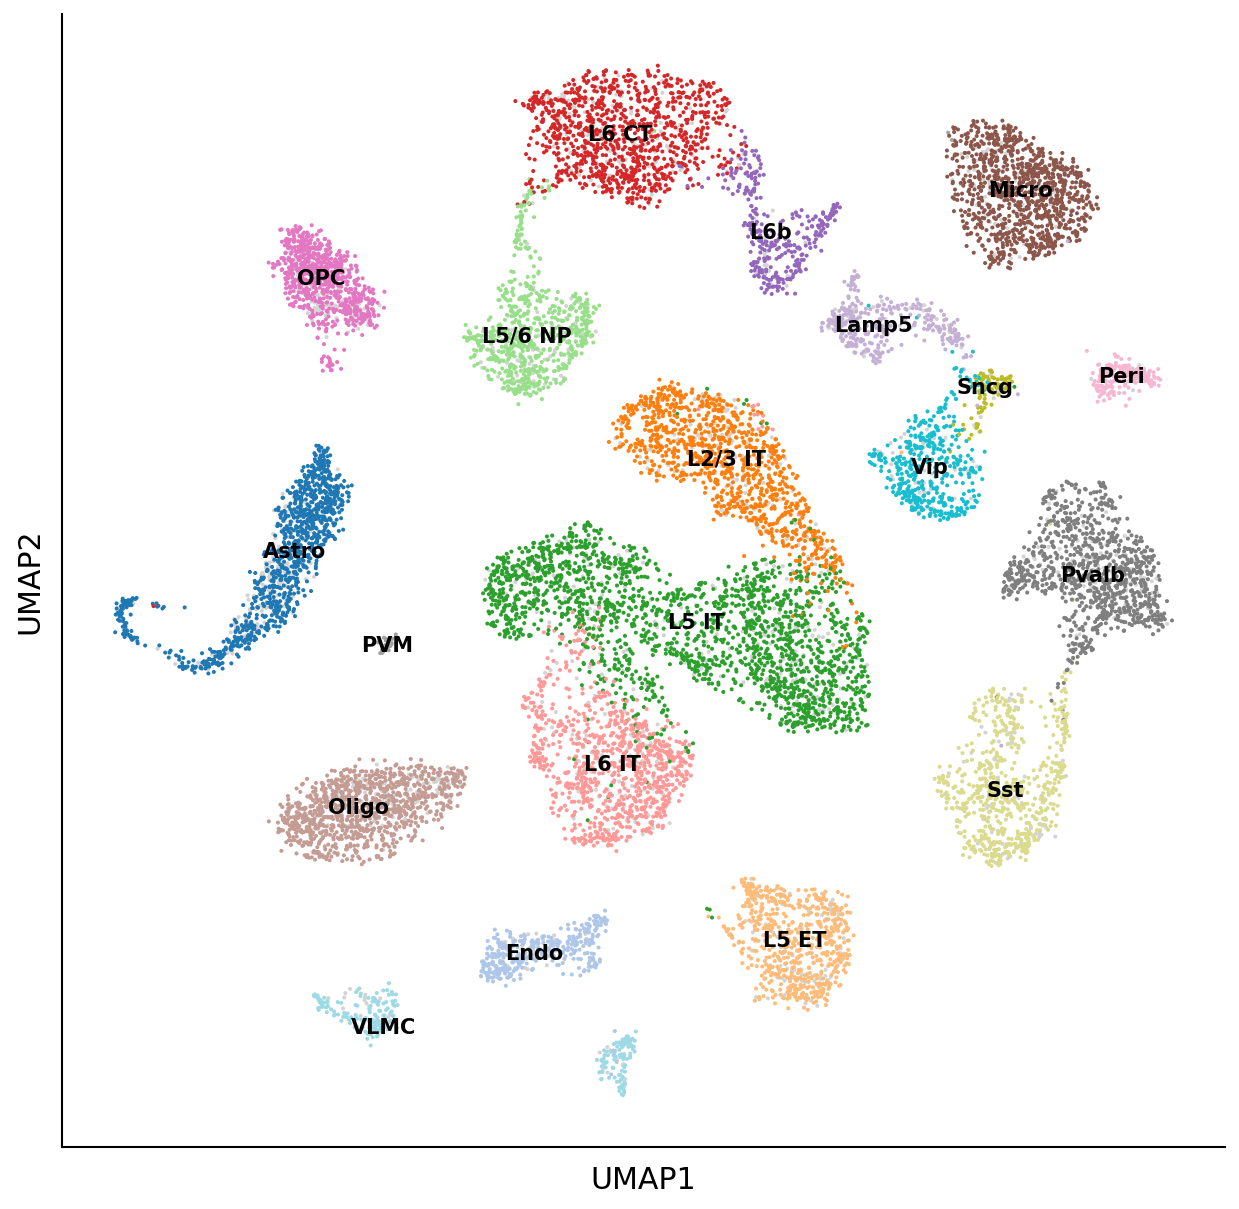

In [46]:
ad_sc = sc.read('../Ckpts_scRefs/MOp/Ref_snRNA_mop_qc3_2Kgenes.h5ad')
sampled_cells = sc.read('../Ckpts_scRefs/MOp/model_460001.h5ad') # 2K cells sampled from the learned gene expression distribution of scRef
cell_type_key='subclass_label'
sns.set_context('paper',font_scale=1.5)
adata_all = PlotSampledData(sampled_cells,ad_sc,cell_type_key,palette=color_dict)

## Fig. d

In [169]:
# We start by concatenating all the generated_cells_spotX_X.h5ad together
ad_res = ConcatCells(s=0,e=6000,inter=1000,es=5551,file_path='../output/merfish/',prefix='generated_cells_spot',suffix='.h5ad')

In [173]:
non_genes=['cdh4','crispld1','prkg1','kcnh5','atp2b4','nos1ap','adamts3']

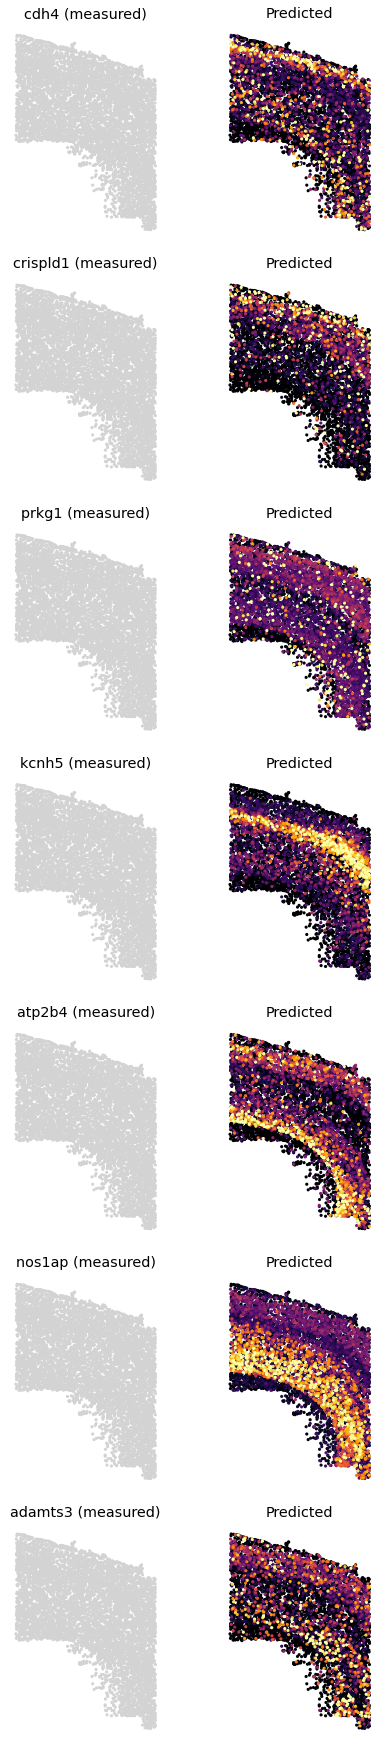

In [174]:
plot_genes_sc(non_genes, adata_measured=ad_sp, adata_predicted=ad_res, x='x',y='y',spot_size=50, scale_factor=0.1, perc=0.02, return_figure=False)

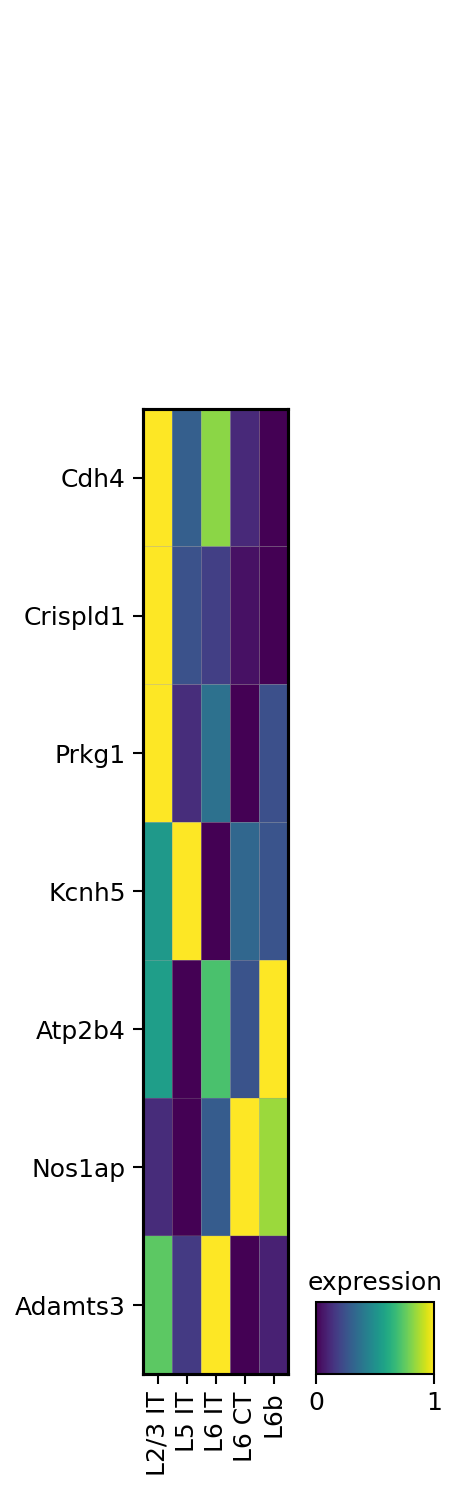

In [175]:
non_genes=['Cdh4','Crispld1','Prkg1','Kcnh5','Atp2b4','Nos1ap','Adamts3']
sns.set_context('paper',font_scale=1.5) 
fig, ax = plt.subplots(figsize=(2.5,12),dpi=150)
sc.pl.matrixplot(sc_data_process_plot, non_genes, groupby='subclass_label', swap_axes=True,ax=ax,colorbar_title='expression',standard_scale='var',categories_order=layers)
plt.show()

## Fig. g-h

In [176]:
def VisualscDE(ad_sc,gene):
    tmp = ad_sc[:,gene].X
    tmp = (tmp - tmp.min()) / (tmp.max() - tmp.min())
    ad_sc.obs['visual_gene'] = tmp
    fig, axs = plt.subplots(1, 1, figsize=(10, 10))
    sc.pl.umap(
        ad_sc, color="visual_gene", size=12, frameon=False, show=False, ax=axs, cmap='coolwarm',title='${}$'.format(gene)
    )
    plt.tight_layout()

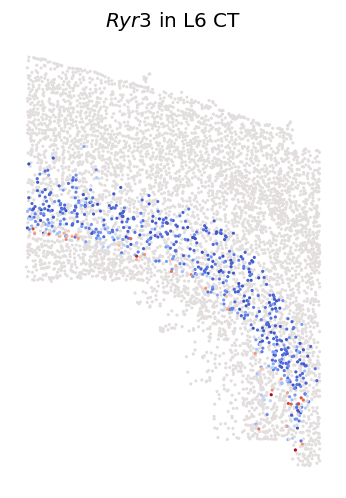

In [178]:
gene = 'Ryr3'
ct = 'L6 CT'
fig, ax = plt.subplots(1, 1, figsize=(12, 6),dpi=100)
PlotVisiumGene(ad_res,gene,0.8,perc=0.005,ax=ax,vis_index=ad_res.obs['discrete_label_ct']==ct,vis_index_0=False,
               palette='coolwarm',colorbar_loc=None,title='${}$ in {}'.format(gene,ct))
plt.show()

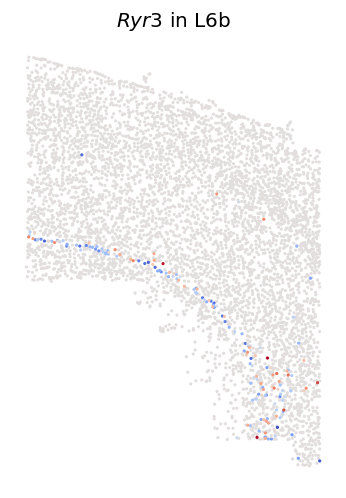

In [180]:
gene = 'Ryr3'
ct = 'L6b'
fig, ax = plt.subplots(1, 1, figsize=(12, 6),dpi=100)
PlotVisiumGene(ad_res,gene,0.8,perc=0.005,ax=ax,vis_index=ad_res.obs['discrete_label_ct']==ct,vis_index_0=False,
               palette='coolwarm',colorbar_loc=None,title='${}$ in {}'.format(gene,ct))
plt.show()

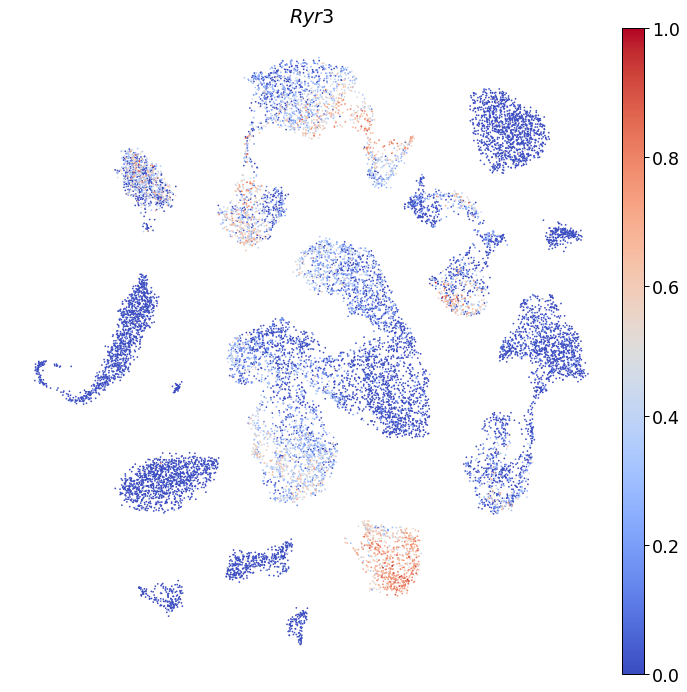

In [181]:
sns.set_context('paper',font_scale=2) 
gene = 'Ryr3'
VisualscDE(adata_all,gene)

## Fig. c

#### Run gene expression imputation with leave some genes out

In [169]:
# We start by concatenating all the generated_cells_spotX_X.h5ad together
ad_res = ConcatCells(s=0,e=6000,inter=1000,es=5551,file_path='../output/merfish/',prefix='generated_cells_spot',suffix='.h5ad')

In [170]:
test_genes = 'Cux2, Otof, Rorb, Rspo1, Sulf2, Fezf2, Osr1'.split(', ')
test_genes = [_.lower() for _ in test_genes]

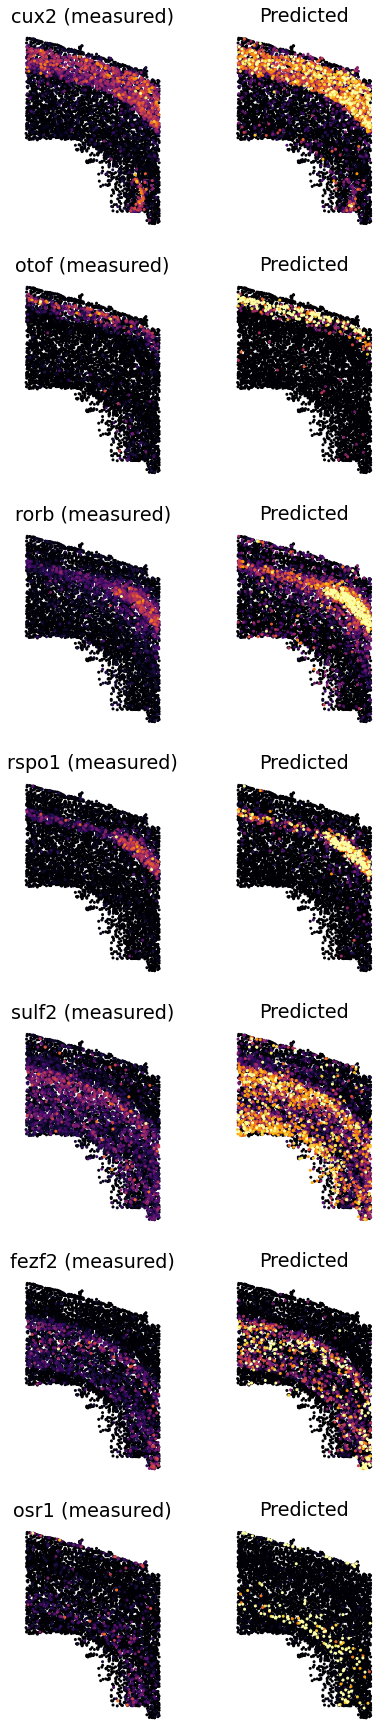

In [171]:
plot_genes_sc(test_genes, adata_measured=ad_sp, adata_predicted=ad_res, x='x',y='y',spot_size=50, scale_factor=0.1, perc=0.02, return_figure=False)

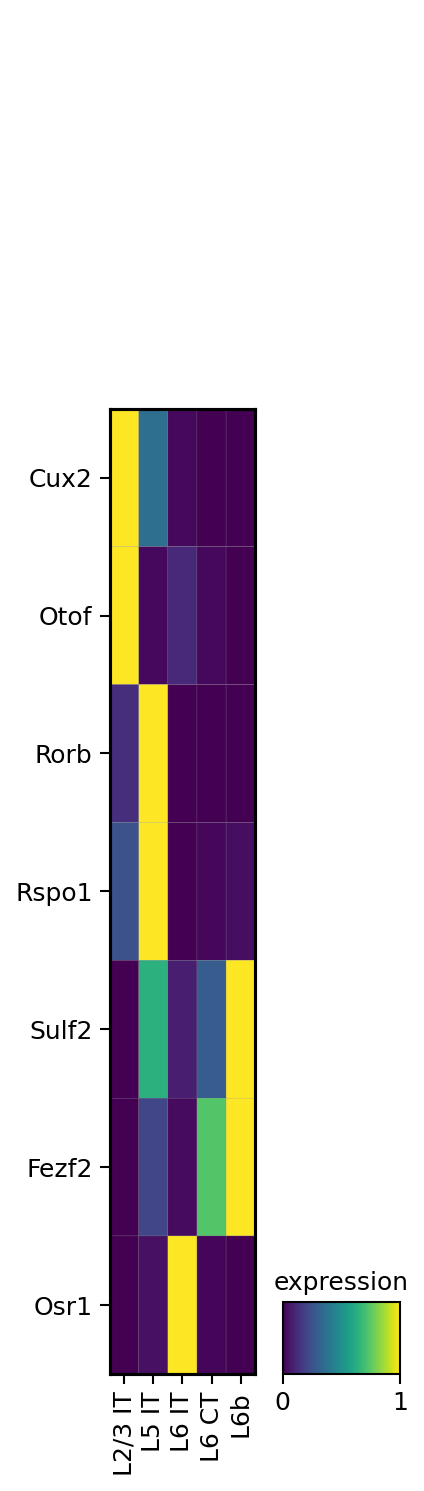

In [172]:
layers = ['L2/3 IT', 'L5 IT', 'L6 IT', 'L6 CT', 'L6b']
sc_data_process_plot = ad_sc[ad_sc.obs['subclass_label'].isin(layers)]
test_genes = 'Cux2, Otof, Rorb, Rspo1, Sulf2, Fezf2, Osr1'.split(', ')
sns.set_context('paper',font_scale=1.5) 
fig, ax = plt.subplots(figsize=(2.5,12),dpi=150)
sc.pl.matrixplot(sc_data_process_plot, test_genes, groupby='subclass_label', swap_axes=True,ax=ax,colorbar_title='expression',standard_scale='var',categories_order=layers)
plt.show()